# Fires in Pittsburgh and the best neighborhood 
In this section of team COPS' final project, I, Alex Chlpka will explain how I found my metric for best neighborhood as decribed by fire incident data. First, we read in the dataset the I found on the WPRDC website

In [2]:
import pandas as pd
fire_DS = pd.read_csv("Fire_Data.csv")
fire_DS.head(10)

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",2018-03-12T09:13:28,0,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
6,F180022495,113.0,"Cooking fire, confined to container","200 BLOCK E OHIO ST, PITTSBURGH PA 15212",2018-03-14T19:46:10,1,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
7,F180022546,111.0,Building fire,"7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206",2018-03-14T23:49:22,1,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471358,-79.898240
8,F180022773,111.0,Building fire,"100 BLOCK SPENCER AVE, PITTSBURGH PA 15227",2018-03-15T20:39:05,1,231EN23,2904.0,Carrick,4.0,29.0,4.200329e+10,4.0,29.0,3.0,4-15,40.385494,-79.977200
9,F170044316,131.0,Passenger vehicle fire,"1200 BLOCK WESTFIELD ST, PITTSBURGH PA 15216",2017-06-03T01:31:13,0,231EN28,1916.0,Beechview,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-28,40.415219,-80.019516


## This is the first 10 rows of the raw dataset

In [3]:
fire_Sorted_By_Neighborhood = fire_DS.groupby("neighborhood").sum()
fire_DS.groupby("neighborhood").sum()

,incident_type,alarms,census_tract,council_district,ward,tract,public_works_division,pli_division,police_zone,latitude,longitude
neighborhood,,,,,,,,,,,
Allegheny Center,6429.0,24,107907.0,50.0,1100.0,2.100178e+12,50.0,1100.0,50.0,1982.192633,-3920.246192
Allegheny West,4606.0,10,73741.0,34.0,748.0,1.428121e+12,59.0,748.0,34.0,1334.878795,-2640.494942
Allentown,12322.0,75,179709.0,297.0,1782.0,4.158315e+12,416.0,1782.0,297.0,3920.944019,-7759.406504
Arlington,5257.0,23,64160.0,120.0,640.0,1.680142e+12,155.0,640.0,120.0,1616.651186,-3198.912662
Arlington Heights,1443.0,9,19252.0,36.0,192.0,5.040427e+11,43.0,192.0,36.0,485.010786,-959.569919
...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,5045.0,29,41231.0,287.0,410.0,1.722129e+12,82.0,410.0,82.0,1659.682049,-3278.076189
West End,2298.0,6,34324.0,34.0,337.0,7.140610e+11,85.0,337.0,102.0,687.467522,-1360.557092
West Oakland,6681.0,29,21362.0,360.0,209.0,2.184158e+12,156.0,209.0,206.0,2102.936778,-4158.149448


## Sorted by neighborhood and summed the data so that we get the total number of alarms in each neighborhood

In [5]:
fires_by_alarm = fire_Sorted_By_Neighborhood.drop(["incident_type", "census_tract", "council_district", "ward", "tract", "public_works_division", "pli_division", "police_zone", "latitude", "longitude"], axis =1)
print(fires_by_alarm)

                     alarms
neighborhood               
Allegheny Center         24
Allegheny West           10
Allentown                75
Arlington                23
Arlington Heights         9
...                     ...
Upper Lawrenceville      29
West End                  6
West Oakland             29
Westwood                 11
Windgap                   6

[91 rows x 1 columns]


## Take the sorted groups and cut them down to only the alarm and neighborhoods

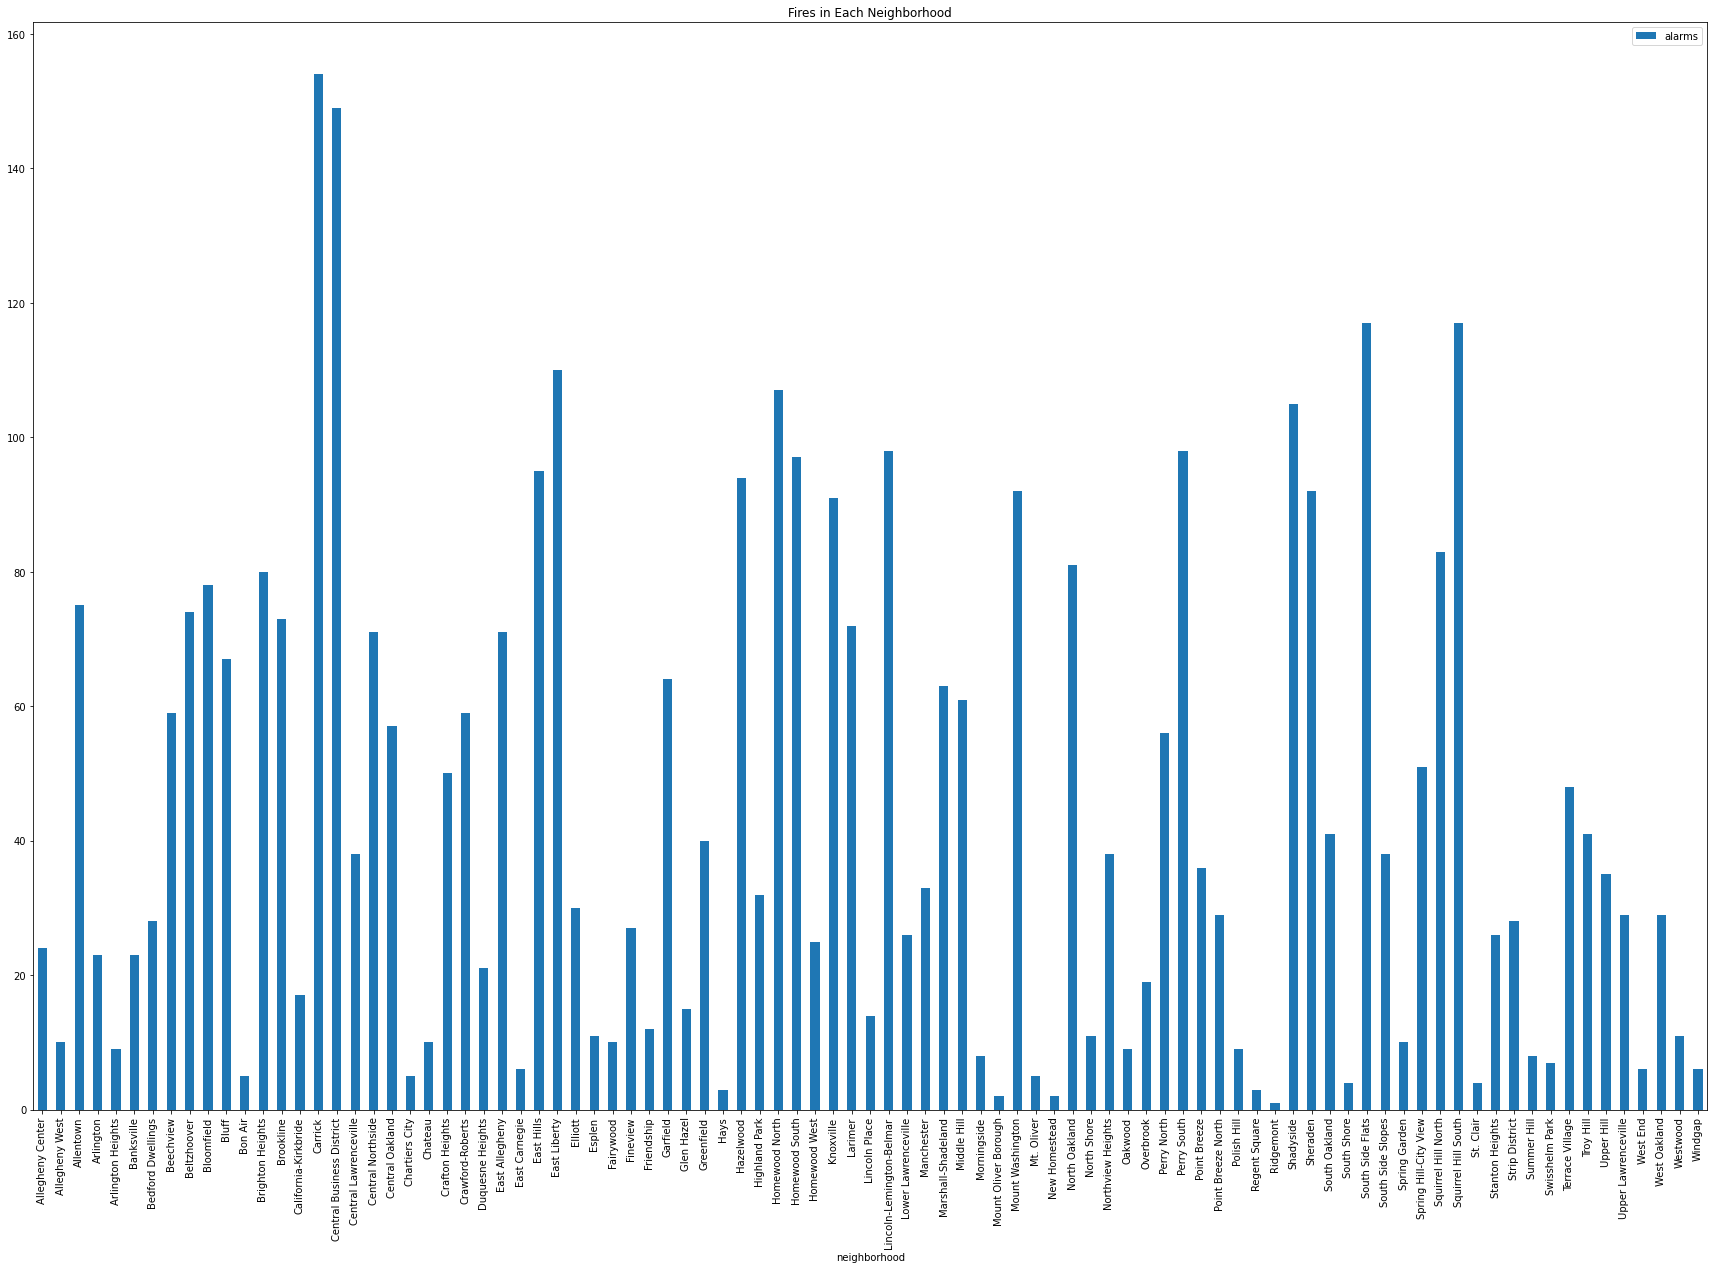

In [11]:
fires_by_alarm.plot(kind = 'bar', figsize = (30,20), title="Fires in Each Neighborhood")

# Conclusion
After looking at the data, we can see that it is sorted by neigborhood and how many alarms were raised in each. This means that the higher the alarm total, the 'worse' a neighborhood is. In order to use this to determine the best neighborhood, we just look to see which one has the least number of alarms.